<a href="https://colab.research.google.com/github/Abhinav9512/Event-Detection-from-Seismic-waves/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSV File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Waveform

2017243


Text(0.5, 1.0, 'Waveform')

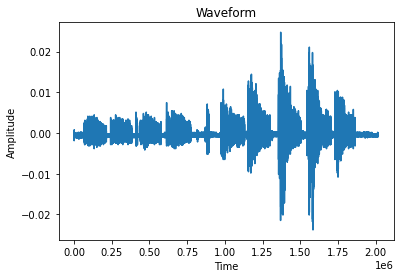

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/CSV files/sensor_a_6_march.csv", header=None, skiprows=10)

df = df.values[:,1]
plt.plot(df)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform')


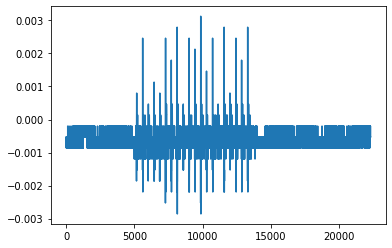

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = "/content/drive/MyDrive/CSV files/"
file_name = "sensor_a_6_march.csv"
dfNoise = pd.read_csv(csv_file_path+file_name,header=None,skiprows=10)
dfNoise = dfNoise.values[63000:85300,1]

plt.plot(dfNoise)

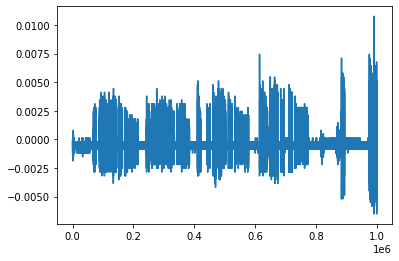

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = "/content/drive/MyDrive/CSV files/"
file_name = "sensor_a_6_march.csv"
df = pd.read_csv(csv_file_path+file_name,header=None,skiprows=10)
df = df.values[0:1000000,1]

plt.plot(df)

Amplitude Thresholding Based Event Detection

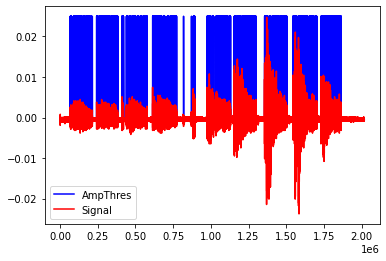

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/CSV files/sensor_a_6_march.csv", header=None, skiprows=10)
df["AmpThres"] =  -0.0005    # Default value is -0.0005 if there is event then it will be 0.025.
df["StartingTime"] = 0.0   # For storing starting time
df["EndingTime"] = 0.0     # For storing ending time
        
x = len(df.values[:,0])         # number of readings
y = df.values[:,1]         #Voltage

def ampThresBasedEventDetection (signalLength, amp):

  t = 0           # For storing time index
  ind = 0         # To store starting time index of event
  flag = 0        # To store ending time index of event

  while t < signalLength:

    if abs(amp[t]) > 0.002:
      df.values[t,2] = 0.025
      if flag == ind :
        df.values[ind,3] = t        # To store starting time of event
        flag = flag + 1  

    if abs(amp[t-1]) > 0.002 and  abs(amp[t])< 0.002 :
      df.values[ind,4] = t - 1      # To store ending time of event
      ind = ind + 1
      
    t=t+1
  
ampThresBasedEventDetection(x,y)

ampThres = df.values[:,2]

plt.plot(ampThres,'b-',label='AmpThres')                       # output of Amplitude Threshold
plt.plot(df.values[:,1],'r-',label='Signal')         # signal

plt.legend()
plt.show()

df.to_csv('/content/drive/MyDrive/CSV files/ampthreshold.csv', index=False)     # To store events

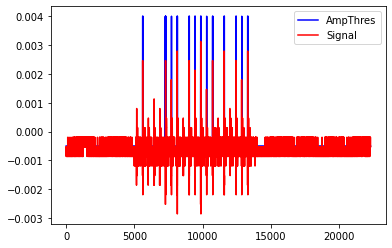

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/CSV files/sensor_a_6_march.csv", header=None, skiprows=10)
df["AmpThres"] =  -0.0005    # Default value is -0.0005 if there is event then it will be 0.004.
df["StartingTime"] = 0.0   # For storing starting time
df["EndingTime"] = 0.0     # For storing ending time
        
x = len(df.values[:,0])         # number of readings
y = df.values[:,1]         #Voltage

def ampThresBasedEventDetection (signalLength, amp):

  t = 0           # For storing time index
  ind = 0         # To store starting time index of event
  flag = 0        # To store ending time index of event

  while t < signalLength:

    if abs(amp[t]) > 0.002:
      df.values[t,2] = 0.004
      if flag == ind :
        df.values[ind,3] = t        # To store starting time of event
        flag = flag + 1  

    if abs(amp[t-1]) > 0.002 and  abs(amp[t])< 0.002 :
      df.values[ind,4] = t - 1      # To store ending time of event
      ind = ind + 1
      
    t=t+1
  
ampThresBasedEventDetection(x,y)

ampThres = df.values[63000:85300,2]

plt.plot(ampThres,'b-',label='AmpThres')                       # output of Amplitude Threshold
plt.plot(df.values[63000:85300,1],'r-',label='Signal')         # signal

plt.legend()
plt.show()

df.to_csv('/content/drive/MyDrive/CSV files/ampthreshold.csv', index=False)     # To store events

Kurtosis Based Event Detection


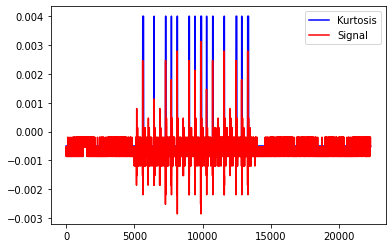

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import kurtosis

df = pd.read_csv("/content/drive/MyDrive/CSV files/sensor_a_6_march.csv", header=None, skiprows=10)

df["Kurtosis"] = -0.0005     # Default value is -0.0005 if there is event then it will be 0.004.
df["StartingTime"] = 0.0   # For storing starting time
df["EndingTime"] = 0.0     # For storing ending time
        
x = len(df.values[:,0])         #Number of readings
y = df.values[:,1]         #Voltage

windowLength = 200

def kurtosisBasedEventDetection (signalLength, amp):

  t = windowLength           # For storing time index
  ind = 0                    # To store starting time index of event
  flag = 0                   # To store ending time index of event

  while t < signalLength - windowLength :
    kts = kurtosis(amp[t-windowLength:t])

    if kts > 8:
      df.values[t,2] = 0.004
      if flag == ind :
        df.values[ind,3] = t     # To store starting time of event
        flag = flag + 1 

    if df.values[t-1,2] == 0.004 and df.values[t,2] != 0.004 :
      df.values[ind,4] = t - 1   # To store ending time of event
      ind = ind + 1
    t=t+1
  
kurtosisBasedEventDetection(x,y)

kurtosisValues = df.values[63000:85300,2]

plt.plot(kurtosisValues,'b-',label='Kurtosis')              # output of kurtosis
plt.plot(df.values[63000:85300,1],'r-',label='Signal')    # signal

plt.legend()
plt.show()

df.to_csv('/content/drive/MyDrive/CSV files/kurtosis.csv', index=False)         # To store events

STA/LTA

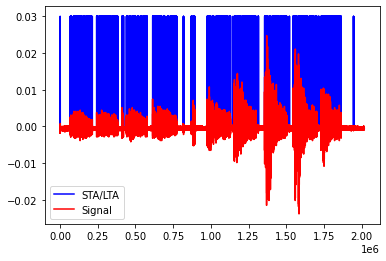

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/CSV files/sensor_a_6_march.csv", header=None, skiprows=10)
df["staLta"] = -0.0005           # Default value is -0.0005 if there is event then it will be 0.03.
df["startingTime"] = 0.0      # For storing starting time
df["endingTime"] = 0.0        # For storing ending time

x = len(df.values[:,0])     #Signal Length
y = df.values[:,1]          #Voltage

shortTermWindow = 25
longTermWindow = shortTermWindow * 5

def stalta (signalLength, amp):
  i = longTermWindow + shortTermWindow
  ind = 0                    # To store starting time index of event
  flag = 0                   # To store ending time index of event

  while i < signalLength  :
    sta = 0.0
    lta = 0.0
    n1 = i-shortTermWindow
    n2 = i-longTermWindow-shortTermWindow
    
    while n1 < i :                                              # to calculate sta
      sta = sta + ((amp[n1]*amp[n1])/shortTermWindow)
      n1 = n1 + 1 
    
    while n2 < i - shortTermWindow:                             # to calculate lta
      lta = lta + ((amp[n2]*amp[n2])/longTermWindow)
      n2 = n2 + 1

    ratio = sta/lta
    
    if ratio > 4:
      df.values[i,2] = 0.03

      if flag == ind :
        df.values[ind,3] = i              # To store starting time of event
        flag = flag + 1
    
    if df.values[i-1,2] == 0.004 and df.values[i,2] != 0.004 :
      df.values[ind,4] = i - 1            # To store ending time of event
      ind = ind + 1

    i=i+1
stalta(x,y)

sta_lta = df.values[:,2]

plt.plot(sta_lta,'b-',label='STA/LTA')                         # output of sta/lta
plt.plot(df.values[:,1],'r-',label='Signal')        # signal

plt.legend()
plt.show()

df.to_csv('/content/drive/MyDrive/CSV files/sta_lta.csv', index=False)          # To store events

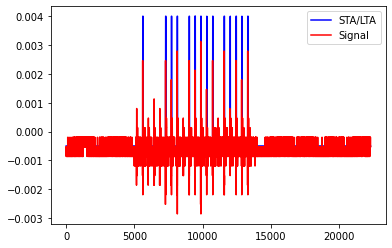

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/CSV files/sensor_a_6_march.csv", header=None, skiprows=10)
df["staLta"] = -0.0005           # Default value is -0.0005 if there is event then it will be 0.004.
df["startingTime"] = 0.0      # For storing starting time
df["endingTime"] = 0.0        # For storing ending time

x = len(df.values[:,0])     #Signal Length
y = df.values[:,1]          #Voltage

shortTermWindow = 25
longTermWindow = shortTermWindow * 5

def stalta (signalLength, amp):
  i = longTermWindow + shortTermWindow
  ind = 0                    # To store starting time index of event
  flag = 0                   # To store ending time index of event

  while i < signalLength  :
    sta = 0.0
    lta = 0.0
    n1 = i-shortTermWindow
    n2 = i-longTermWindow-shortTermWindow
    
    while n1 < i :                                              # to calculate sta
      sta = sta + ((amp[n1]*amp[n1])/shortTermWindow)
      n1 = n1 + 1 
    
    while n2 < i - shortTermWindow:                             # to calculate lta
      lta = lta + ((amp[n2]*amp[n2])/longTermWindow)
      n2 = n2 + 1

    ratio = sta/lta
    
    if ratio > 4:
      df.values[i,2] = 0.004

      if flag == ind :
        df.values[ind,3] = i              # To store starting time of event
        flag = flag + 1
    
    if df.values[i-1,2] == 0.004 and df.values[i,2] != 0.004 :
      df.values[ind,4] = i - 1            # To store ending time of event
      ind = ind + 1

    i=i+1
stalta(x,y)

sta_lta = df.values[63000:85300,2]

plt.plot(sta_lta,'b-',label='STA/LTA')                         # output of sta/lta
plt.plot(df.values[63000:85300,1],'r-',label='Signal')        # signal

plt.legend()
plt.show()

df.to_csv('/content/drive/MyDrive/CSV files/sta_lta.csv', index=False)          # To store events

Modified Energy Ratio

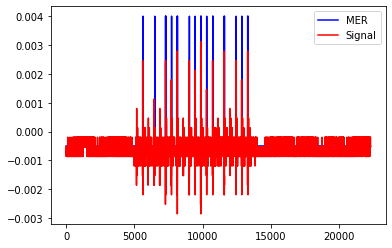

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/CSV files/sensor_a_6_march.csv", header=None, skiprows=10)
df["modifiedEnergyRatio"] = -0.0005      # Default value is -0.0005 if there is event then it will be 0.004.
df["startingTime"] = 0.0              # For storing starting time
df["endingTime"] = 0.0                # For storing ending time

x = len(df.values[:,0])               # length of signal
y = df.values[:,1]                    # Amplitude

L = 50

def modifiedEnergyRatio (signalLength, amp):
  i = L
  ind = 0                             # To store starting time index of event
  flag = 0                            # To store ending time index of event

  while i < signalLength - L:
    num = 0.0
    den = 0.0
    n1 = i-L
    n2 = i
    
    while n1 < i :
      num = num + (amp[n1]*amp[n1]) 
      n1 = n1 + 1 
      
    while n2 < i+L :
      den = den + (amp[n2]*amp[n2])
      n2 = n2 + 1
    
    ratio = (num/den)*abs(amp[i]*amp[i]*amp[i])
    
    if ratio > 0.00000001 :
      df.values[i,2] = 0.004

      if flag == ind :
        df.values[ind,3] = i                  # To store starting time of event
        flag = flag + 1
    
    if df.values[i-1,2] == 0.004 and df.values[i,2] != 0.004 :
      df.values[ind,4] = i - 1                # To store ending time of event
      ind = ind + 1

    i=i+1
modifiedEnergyRatio(x,y)

modified_energy_ratio = df.values[63000:85300,2]

plt.plot(modified_energy_ratio,'b-',label='MER')           # output of modified energy ratio
plt.plot(df.values[63000:85300,1],'r-',label='Signal')        # signal

plt.legend()
plt.show()

df.to_csv('/content/drive/MyDrive/CSV files/mer.csv', index=False)              # To store events

**Algorithm** 1 - Event Detection using STA/LTA

---



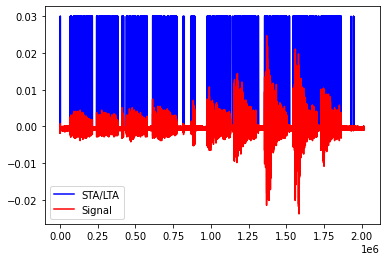

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/CSV files/sensor_a_6_march.csv", header=None, skiprows=10)
df["staLta"] = -0.0005       # Default value is -0.0005 if there is event then it will be 0.03. sig_event

x = len(df.values[:,0])     #Signal Length
y = df.values[:,1]          #Voltage

shortTermWindow = 25
longTermWindow = shortTermWindow * 5
overlappingFactor = 0.9

def stalta (signalLength, amp):
  i = 1
  K = math.floor(signalLength/(1 - overlappingFactor)*(shortTermWindow + longTermWindow))

  while i < K  :
    sta = 0.0
    lta = 0.0
    start = math.floor((1-overlappingFactor)*(shortTermWindow + longTermWindow))*(i-1) + 1
    stop = start + shortTermWindow + longTermWindow - 1
    lta_start = start
    lta_stop = lta_start + longTermWindow - 1
    sta_start = stop - shortTermWindow
    sta_stop = stop
    n1 = sta_start
    n2 = lta_start
    
    if stop >= signalLength :
      break;

    while n1 < sta_stop :                                 # to calculate sta 
      sta = sta + ((amp[n1]*amp[n1])/shortTermWindow)
      n1 = n1 + 1 
    
    while n2 < lta_stop:                                  # to calculate lta
      lta = lta + ((amp[n2]*amp[n2])/longTermWindow)
      n2 = n2 + 1

    ratio = sta/lta
    
    if ratio > 4:
      df.values[start:stop,2] = 0.03
    i=i+1
stalta(x,y)

plt.plot(df.values[:,2],'b-',label='STA/LTA')            # output of Algorithm 1
plt.plot(df.values[:,1],'r-',label='Signal')        # signal
plt.legend()
plt.show()

df.to_csv('/content/drive/MyDrive/CSV files/sta_lta_1.csv', index=False)        # To store events

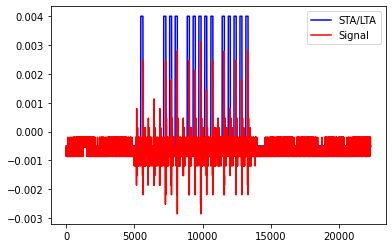

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/CSV files/sensor_a_6_march.csv", header=None, skiprows=10)
df["staLta"] = -0.0005       # Default value is -0.0005 if there is event then it will be 0.004. sig_event

x = len(df.values[:,0])     #Signal Length
y = df.values[:,1]          #Voltage

shortTermWindow = 25
longTermWindow = shortTermWindow * 5
overlappingFactor = 0.9

def stalta (signalLength, amp):
  i = 1
  K = math.floor(signalLength/(1 - overlappingFactor)*(shortTermWindow + longTermWindow))

  while i < K  :
    sta = 0.0
    lta = 0.0
    start = math.floor((1-overlappingFactor)*(shortTermWindow + longTermWindow))*(i-1) + 1
    stop = start + shortTermWindow + longTermWindow - 1
    lta_start = start
    lta_stop = lta_start + longTermWindow - 1
    sta_start = stop - shortTermWindow
    sta_stop = stop
    n1 = sta_start
    n2 = lta_start
    
    if stop >= signalLength :
      break;

    while n1 < sta_stop :                                 # to calculate sta 
      sta = sta + ((amp[n1]*amp[n1])/shortTermWindow)
      n1 = n1 + 1 
    
    while n2 < lta_stop:                                  # to calculate lta
      lta = lta + ((amp[n2]*amp[n2])/longTermWindow)
      n2 = n2 + 1

    ratio = sta/lta
    
    if ratio > 4:
      df.values[start:stop,2] = 0.004

    i=i+1
stalta(x,y)

plt.plot(df.values[63000:85300,2],'b-',label='STA/LTA')            # output of Algorithm 1
plt.plot(df.values[63000:85300,1],'r-',label='Signal')        # signal
plt.legend()
plt.show()

df.to_csv('/content/drive/MyDrive/CSV files/sta_lta_1.csv', index=False)        # To store events

**Algorithm** 2 - Event Extraction using Adaptive Thresholding


---




Envelope Extraction

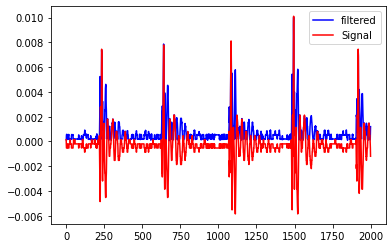

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal

df = pd.read_csv("/content/drive/MyDrive/CSV files/sensor_a_6_march.csv", header=None, skiprows=10)           # Read csv file

b, a = signal.butter(5, 0.8, 'low')
Env = signal.filtfilt(b, a, np.abs(df.values[1410000:1412000,1]))            # Signal's Envelope : Env
plt.plot(Env,'b',label='filtered')
plt.plot(df.values[1410000:1412000,1],'r',label='Signal')

plt.legend()
plt.show()

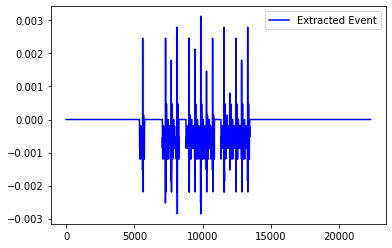

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import signal

df = pd.read_csv("/content/drive/MyDrive/CSV files/sensor_a_6_march.csv", header=None, skiprows=10)           # Read csv file
df["staLta"] = 0.0      # Default value is 0 if there is event then it will be 1. sig_event
df["Env"] = 0.0         # Filtered Signal
df["Adaptive Threshold"] = 0.0      # Default value is 0 if there is event then it will be 1. 

x = len(df.values[:,0])     #Signal Length
y = df.values[:,1]          #Voltage

# Envelope Extraction-----------------------------------------------------------------------

b, a = signal.butter(5, 0.8, 'low')
df.values[:,3] = signal.filtfilt(b, a, np.abs(y))            # Signal's Envelope : Env
Env = df.values[:,3]

# STA/LTA ----------------------------------------------------------------------------------

shortTermWindow = 25
longTermWindow = shortTermWindow * 5
overlappingFactor = 0.9

def stalta (signalLength, amp):
  i = 1
  K = math.floor(signalLength/(1 - overlappingFactor)*(shortTermWindow + longTermWindow))

  while i < K  :
    sta = 0.0
    lta = 0.0
    start = math.floor((1-overlappingFactor)*(shortTermWindow + longTermWindow))*(i-1) + 1
    stop = start + shortTermWindow + longTermWindow - 1
    lta_start = start
    lta_stop = lta_start + longTermWindow - 1
    sta_start = stop - shortTermWindow
    sta_stop = stop
    n1 = sta_start
    n2 = lta_start
    
    if stop >= signalLength :
      break;

    while n1 < sta_stop :                                 # to calculate sta 
      sta = sta + ((amp[n1]*amp[n1])/shortTermWindow)
      n1 = n1 + 1 
    
    while n2 < lta_stop:                                  # to calculate lta
      lta = lta + ((amp[n2]*amp[n2])/longTermWindow)
      n2 = n2 + 1

    ratio = sta/lta
    
    if ratio > 4:
      df.values[start:stop,2] = 1.0

    i=i+1
stalta(x,y)

sig_event = df.values[:,2]           # Default value is 0 if there is event then it will be 1.

# Adaptive Thresholding ---------------------------------------------------------------------

def AdaptiveThreshold (signalLength ,Env , sig_event):
  k = 0.005
  i = 0
  beginning = 0
  trailing_time = 0

  while i < signalLength :
    i = beginning
    while i < signalLength :
      if sig_event[i] == 1.0 : 
        while sig_event[i] != 0.0 :
          i = i + 1
          if i >= signalLength :
            break
        trailing_time = i-1
        break
      else :
        i=i+1
        continue
      i = i+1 
    start_time = trailing_time - 250
    stop_time = start_time + 370
    total_time = stop_time - start_time     

    mean_env = 0.0
    j = start_time

    while j < stop_time :                                 
      mean_env = mean_env + (Env[j]/total_time)
      j = j + 1
    
    env_threshold = mean_env * k                          # k = 0.005 : envelope threshold fraction

    if Env[trailing_time] >= env_threshold :
      df.values[start_time:stop_time,4] = 1
      
    beginning = stop_time

  final_sig = df.values[63000:85300,4] * df.values[63000:85300,1] 
  return final_sig

finalSignal = AdaptiveThreshold(x ,Env , sig_event)

plt.plot(finalSignal,'b',label='Extracted Event')               # To plot extracted Events

plt.legend()
plt.show()

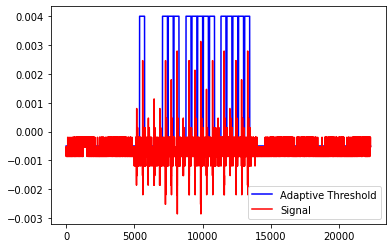

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import signal

df = pd.read_csv("/content/drive/MyDrive/CSV files/sensor_a_6_march.csv", header=None, skiprows=10)           # Read csv file
df["staLta"] = 0.0      # Default value is 0 if there is event then it will be 1. sig_event
df["Env"] = 0.0         # Filtered Signal
df["Adaptive Threshold"] = -0.0005      # Default value is -0.0005 if there is event then it will be 0.004. 

x = len(df.values[:,0])     #Signal Length
y = df.values[:,1]          #Voltage

# Envelope Extraction-----------------------------------------------------------------------

b, a = signal.butter(5, 0.8, 'low')
df.values[:,3] = signal.filtfilt(b, a, np.abs(y))            # Signal's Envelope : Env
Env = df.values[:,3]

# STA/LTA ----------------------------------------------------------------------------------

shortTermWindow = 25
longTermWindow = shortTermWindow * 5
overlappingFactor = 0.9

def stalta (signalLength, amp):
  i = 1
  K = math.floor(signalLength/(1 - overlappingFactor)*(shortTermWindow + longTermWindow))

  while i < K  :
    sta = 0.0
    lta = 0.0
    start = math.floor((1-overlappingFactor)*(shortTermWindow + longTermWindow))*(i-1) + 1
    stop = start + shortTermWindow + longTermWindow - 1
    lta_start = start
    lta_stop = lta_start + longTermWindow - 1
    sta_start = stop - shortTermWindow
    sta_stop = stop
    n1 = sta_start
    n2 = lta_start
    
    if stop >= signalLength :
      break;

    while n1 < sta_stop :                                 # to calculate sta 
      sta = sta + ((amp[n1]*amp[n1])/shortTermWindow)
      n1 = n1 + 1 
    
    while n2 < lta_stop:                                  # to calculate lta
      lta = lta + ((amp[n2]*amp[n2])/longTermWindow)
      n2 = n2 + 1

    ratio = sta/lta
    
    if ratio > 4:
      df.values[start:stop,2] = 1.0

    i=i+1
stalta(x,y)

sig_event = df.values[:,2]           # Default value is 0 if there is event then it will be 1.

# Adaptive Thresholding ---------------------------------------------------------------------

def AdaptiveThreshold (signalLength ,Env , sig_event):
  k = 0.005
  i = 0
  beginning = 0
  trailing_time = 0

  while i < signalLength :
    i = beginning
    while i < signalLength :
      if sig_event[i] == 1.0 : 
        while sig_event[i] != 0.0 :
          i = i + 1
          if i >= signalLength :
            break
        trailing_time = i-1
        break
      else :
        i=i+1
        continue
      i = i+1 
    start_time = trailing_time - 250
    stop_time = start_time + 370
    total_time = stop_time - start_time     

    mean_env = 0.0
    j = start_time

    while j < stop_time :                                 
      mean_env = mean_env + (Env[j]/total_time)
      j = j + 1
    
    env_threshold = mean_env * k                          # k = 0.005 : envelope threshold fraction

    if Env[trailing_time] >= env_threshold :
      df.values[start_time:stop_time,4] = 0.004
      
    beginning = stop_time

  final_sig = df.values[63000:85300,4]
  return final_sig

finalSignal = AdaptiveThreshold(x ,Env , sig_event)

plt.plot(finalSignal,'b',label='Adaptive Threshold')            # To plot extracted Event Envelope
plt.plot(df.values[63000:85300,1],'r',label='Signal')           # To plot Signal

plt.legend()
plt.show()

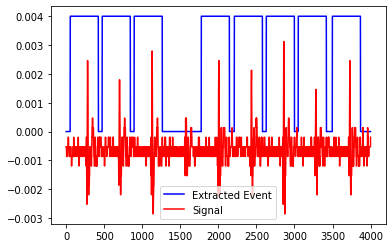

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import signal

df = pd.read_csv("/content/drive/MyDrive/CSV files/sensor_a_6_march.csv", header=None, skiprows=10)           # Read csv file
df["staLta"] = 0.0      # Default value is 0 if there is event then it will be 1. sig_event
df["Env"] = 0.0         # Filtered Signal
df["Adaptive Threshold"] = 0.0      # Default value is 0 if there is event then it will be 1. 

x = len(df.values[:,0])     #Signal Length
y = df.values[:,1]          #Voltage

# Envelope Extraction-----------------------------------------------------------------------

b, a = signal.butter(5, 0.8, 'low')
df.values[:,3] = signal.filtfilt(b, a, np.abs(y))            # Signal's Envelope : Env
Env = df.values[:,3]

# STA/LTA ----------------------------------------------------------------------------------

shortTermWindow = 25
longTermWindow = shortTermWindow * 5
overlappingFactor = 0.9

def stalta (signalLength, amp):
  i = 1
  K = math.floor(signalLength/(1 - overlappingFactor)*(shortTermWindow + longTermWindow))

  while i < K  :
    sta = 0.0
    lta = 0.0
    start = math.floor((1-overlappingFactor)*(shortTermWindow + longTermWindow))*(i-1) + 1
    stop = start + shortTermWindow + longTermWindow - 1
    lta_start = start
    lta_stop = lta_start + longTermWindow - 1
    sta_start = stop - shortTermWindow
    sta_stop = stop
    n1 = sta_start
    n2 = lta_start
    
    if stop >= signalLength :
      break;

    while n1 < sta_stop :                                 # to calculate sta 
      sta = sta + ((amp[n1]*amp[n1])/shortTermWindow)
      n1 = n1 + 1 
    
    while n2 < lta_stop:                                  # to calculate lta
      lta = lta + ((amp[n2]*amp[n2])/longTermWindow)
      n2 = n2 + 1

    ratio = sta/lta
    
    if ratio > 4:
      df.values[start:stop,2] = 1.0

    i=i+1
stalta(x,y)

sig_event = df.values[:,2]           # Default value is 0 if there is event then it will be 1.

# Adaptive Thresholding ---------------------------------------------------------------------

def AdaptiveThreshold (signalLength ,Env , sig_event):
  k = 0.005
  i = 0
  beginning = 0
  trailing_time = 0

  while i < signalLength :
    i = beginning
    while i < signalLength :
      if sig_event[i] == 1.0 : 
        while sig_event[i] != 0.0 :
          i = i + 1
          if i >= signalLength :
            break
        trailing_time = i-1
        break
      else :
        i=i+1
        continue
      i = i+1 
    start_time = trailing_time - 250
    stop_time = start_time + 370
    total_time = stop_time - start_time     

    mean_env = 0.0
    j = start_time

    while j < stop_time :                                 
      mean_env = mean_env + (Env[j]/total_time)
      j = j + 1
    
    env_threshold = mean_env * k                          # k = 0.005 : envelope threshold fraction

    if Env[trailing_time] >= env_threshold :
      df.values[start_time:stop_time,4] = 0.004
      
    beginning = stop_time

  final_sig = df.values[70000:74000,4] 
  return final_sig

finalSignal = AdaptiveThreshold(x ,Env , sig_event)

plt.plot(finalSignal,'b',label='Extracted Event')                     # To plot extracted Event Envelope
plt.plot(df.values[70000:74000,1],'r',label='Signal')                 # To plot signal
plt.savefig()
plt.legend()
plt.show()

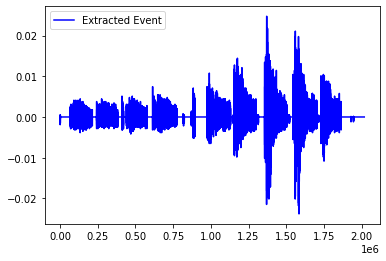

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import signal

df = pd.read_csv("/content/drive/MyDrive/CSV files/sensor_a_6_march.csv", header=None, skiprows=10)           # Read csv file
df["staLta"] = 0.0      # Default value is 0 if there is event then it will be 1. sig_event
df["Env"] = 0.0         # Filtered Signal
df["Adaptive Threshold"] = 0.0      # Default value is 0 if there is event then it will be 1. 

x = len(df.values[:,0])     #Signal Length
y = df.values[:,1]          #Voltage

# Envelope Extraction-----------------------------------------------------------------------

b, a = signal.butter(5, 0.8, 'low')
df.values[:,3] = signal.filtfilt(b, a, np.abs(y))            # Signal's Envelope : Env
Env = df.values[:,3]

# STA/LTA ----------------------------------------------------------------------------------

shortTermWindow = 25
longTermWindow = shortTermWindow * 5
overlappingFactor = 0.9

def stalta (signalLength, amp):
  i = 1
  K = math.floor(signalLength/(1 - overlappingFactor)*(shortTermWindow + longTermWindow))

  while i < K  :
    sta = 0.0
    lta = 0.0
    start = math.floor((1-overlappingFactor)*(shortTermWindow + longTermWindow))*(i-1) + 1
    stop = start + shortTermWindow + longTermWindow - 1
    lta_start = start
    lta_stop = lta_start + longTermWindow - 1
    sta_start = stop - shortTermWindow
    sta_stop = stop
    n1 = sta_start
    n2 = lta_start
    
    if stop >= signalLength :
      break;

    while n1 < sta_stop :                                 # to calculate sta 
      sta = sta + ((amp[n1]*amp[n1])/shortTermWindow)
      n1 = n1 + 1 
    
    while n2 < lta_stop:                                  # to calculate lta
      lta = lta + ((amp[n2]*amp[n2])/longTermWindow)
      n2 = n2 + 1

    ratio = sta/lta
    
    if ratio > 4:
      df.values[start:stop,2] = 1.0

    i=i+1
stalta(x,y)

sig_event = df.values[:,2]           # Default value is 0 if there is event then it will be 1.

# Adaptive Thresholding ---------------------------------------------------------------------

def AdaptiveThreshold (signalLength ,Env , sig_event):
  k = 0.005
  i = 0
  beginning = 0
  trailing_time = 0

  while i < signalLength :
    i = beginning
    while i < signalLength :
      if sig_event[i] == 1.0 : 
        while sig_event[i] != 0.0 :
          i = i + 1
          if i >= signalLength :
            break
        trailing_time = i-1
        break
      else :
        i=i+1
        continue
      i = i+1 
    start_time = trailing_time - 250
    stop_time = start_time + 370
    total_time = stop_time - start_time     

    mean_env = 0.0
    j = start_time

    while j < stop_time :                                 
      mean_env = mean_env + (Env[j]/total_time)
      j = j + 1
    
    env_threshold = mean_env * k                          # k = 0.005 : envelope threshold fraction

    if Env[trailing_time] >= env_threshold :
      df.values[start_time:stop_time,4] = 1
      
    beginning = stop_time

  final_sig = df.values[:,4] * df.values[:,1] 
  return final_sig

finalSignal = AdaptiveThreshold(x ,Env , sig_event)

plt.plot(finalSignal,'b',label='Extracted Event')                       # To plot extracted Events

plt.legend()
plt.show()